In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
def plot_prec_rec(df, thresholded = 0, graph_title = 'Precision and recall'):
        mask= (df['thresholded?'] == thresholded)
        bins = pd.cut(df["threshold"], np.arange(0, 0.055, 0.0005))

        df_by_iter = df[mask].groupby(['iteration', bins]).mean()[['precision','recall']]
        to_plot = df_by_iter.groupby(['threshold']).mean()
        to_plot[['prec_std', 'rec_std']] = df_by_iter.groupby(['threshold']).std()[['precision', 'recall']]
        to_plot['x'] = 100*pd.IntervalIndex(to_plot.index.get_level_values('threshold')).left
        to_plot = to_plot.reset_index().drop('threshold', axis=1)
        to_plot['prec_lower'] = to_plot.precision - 1.96*to_plot.prec_std
        to_plot['prec_upper'] = to_plot.precision + 1.96*to_plot.prec_std
        to_plot['rec_lower'] = to_plot.recall - 1.96*to_plot.rec_std
        to_plot['rec_upper'] = to_plot.recall + 1.96*to_plot.rec_std

        fig, ax = plt.subplots()
        ax.scatter(to_plot.x, to_plot.precision, color = 'blue', alpha = 0.5, label="Precision")
        ax.scatter(to_plot.x, to_plot.recall, color = 'red', alpha = 0.5, label="Recall")

        ax.set_xlabel('Probability of positive, at which the image is predicted positive, %')
        ax.set_title(graph_title)
        ax.legend(loc='lower right')
        ax.set_ylim(0.1,1)
        print(to_plot.head())

In [12]:
def prec_recall_fixed_thr(df, graph_title = 'Precision and recall'):
        avgs = df.groupby(['threshold']).mean()[['precision','recall']]
        stds = df.groupby(['threshold']).std()[['precision','recall']]
        stds.columns = ['prec_std', 'rec_std']
        to_plot = pd.concat([avgs, stds], axis=1)
        to_plot['prec_lower'] = to_plot.precision - to_plot.prec_std
        to_plot['prec_upper'] = to_plot.precision + to_plot.prec_std
        to_plot['rec_lower'] = to_plot.recall - to_plot.rec_std
        to_plot['rec_upper'] = to_plot.recall + to_plot.rec_std
        to_plot['thr_percent'] = 100*to_plot.index

        fig, ax = plt.subplots()
        ax.scatter(to_plot.thr_percent, to_plot.precision, color = 'blue', alpha = 0.5, label="Precision")
        ax.fill_between(to_plot.thr_percent, to_plot.prec_upper, to_plot.prec_lower, color='blue', alpha=.2)
        ax.scatter(to_plot.thr_percent, to_plot.recall, color = 'red', alpha = 0.5, label="Recall")
        ax.fill_between(to_plot.thr_percent, to_plot.rec_upper, to_plot.rec_lower, color='red', alpha=.2)
        
        ax.set_title(graph_title)
        ax.set_xlim(left=0.05)
        ax.set_xlabel('Probability of positive, at which the image is predicted positive, %')
        ax.legend(loc='lower right')
        print(to_plot.head())

/tmp/ipykernel_52063/2777424732.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_by_iter = df[mask].groupby(['iteration', bins]).mean()[['precision','recall']]
/tmp/ipykernel_52063/2777424732.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  to_plot = df_by_iter.groupby(['threshold']).mean()
/tmp/ipykernel_52063/2777424732.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  to_plot[['prec_std', 'rec_std']] = df_b

   precision    recall  prec_std  rec_std     x  prec_lower  prec_upper  \
0   0.158897  0.980921       NaN      NaN  0.00         NaN         NaN   
1   0.415013  0.921399       NaN      NaN  0.05         NaN         NaN   
2   0.451999  0.893464       NaN      NaN  0.10         NaN         NaN   
3   0.471663  0.877778       NaN      NaN  0.15         NaN         NaN   
4   0.483203  0.877778       NaN      NaN  0.20         NaN         NaN   

   rec_lower  rec_upper  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


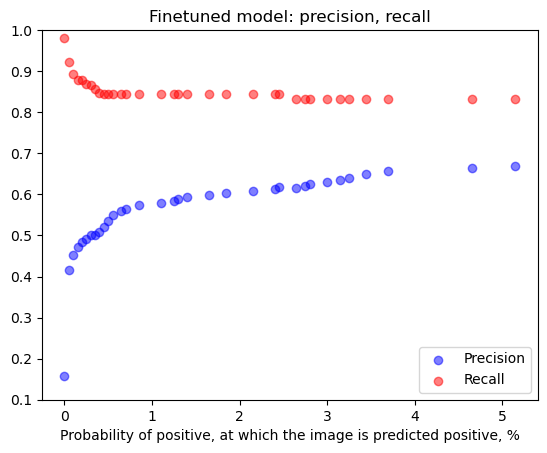

In [35]:
df = pd.read_csv(f'B5_prec_rec_finetuned.csv', delimiter='\t')
plot_prec_rec(df, graph_title = 'Finetuned model: precision, recall')

/tmp/ipykernel_52063/2777424732.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_by_iter = df[mask].groupby(['iteration', bins]).mean()[['precision','recall']]
/tmp/ipykernel_52063/2777424732.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  to_plot = df_by_iter.groupby(['threshold']).mean()
/tmp/ipykernel_52063/2777424732.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  to_plot[['prec_std', 'rec_std']] = df_b

   precision    recall  prec_std  rec_std     x  prec_lower  prec_upper  \
0   0.100055  0.969059       NaN      NaN  0.00         NaN         NaN   
1   0.143468  0.934767       NaN      NaN  0.05         NaN         NaN   
2   0.170613  0.930317       NaN      NaN  0.10         NaN         NaN   
3   0.191416  0.922222       NaN      NaN  0.15         NaN         NaN   
4   0.210523  0.922222       NaN      NaN  0.20         NaN         NaN   

   rec_lower  rec_upper  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


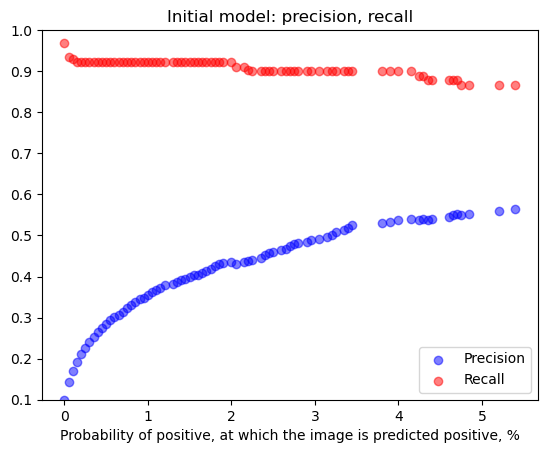

In [36]:
df = pd.read_csv(f'B5_prec_rec_custom_aug_before_tune.csv', delimiter='\t')
plot_prec_rec(df, graph_title = 'Initial model: precision, recall')

           precision    recall  prec_std  rec_std  prec_lower  prec_upper  \
threshold                                                                   
0.0000      0.079435  1.000000       NaN      NaN         NaN         NaN   
0.0005      0.132244  0.988889       NaN      NaN         NaN         NaN   
0.0010      0.158845  0.977778       NaN      NaN         NaN         NaN   
0.0015      0.182390  0.966667       NaN      NaN         NaN         NaN   
0.0020      0.205674  0.966667       NaN      NaN         NaN         NaN   

           rec_lower  rec_upper  thr_percent  
threshold                                     
0.0000           NaN        NaN         0.00  
0.0005           NaN        NaN         0.05  
0.0010           NaN        NaN         0.10  
0.0015           NaN        NaN         0.15  
0.0020           NaN        NaN         0.20  


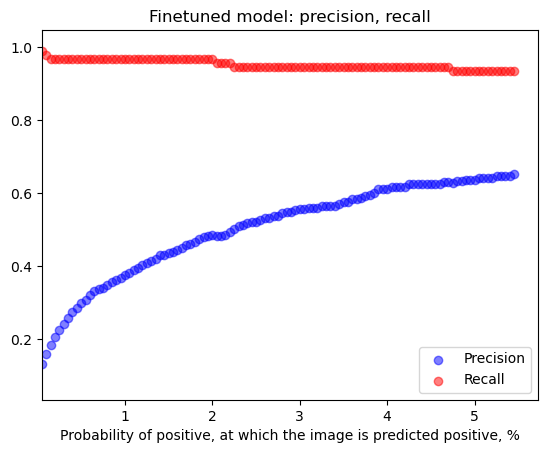

In [17]:
df = pd.read_csv(f'prec_rec_B5_initial.csv', delimiter='\t')
prec_recall_fixed_thr(df, graph_title = 'Initial model: precision, recall')

In [15]:
df

,threshold,precision,recall
0,0.0000,0.079435,1.000000
1,0.0005,0.132244,0.988889
2,0.0010,0.158845,0.977778
3,0.0015,0.182390,0.966667
4,0.0020,0.205674,0.966667
...,...,...,...
105,0.0525,0.646154,0.933333
106,0.0530,0.646154,0.933333
107,0.0535,0.646154,0.933333
108,0.0540,0.646154,0.933333
